In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [69]:
#!pip install chart_studio

In [70]:
#pip install --upgrade pip

In [71]:
#!pip install cufflinks

In [72]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [73]:
ob=pd.read_json('Order_breakdown.json')
ob.head()

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


## Data Cleaning

In [74]:
ob.shape# checking the no.of rows and no.of columns

(8047, 9)

$Observation$:
* It has 8047 rows and 9 columns

In [75]:
ob.duplicated().sum()# checking the data set contains duplicates

2

In [76]:
ob=ob.drop_duplicates()
ob.duplicated().sum()# There are 2 duplicates in the data set so we dropped it

0

In [77]:
ob.shape# the data set after droping the duplicates

(8045, 9)

In [78]:
ob.isnull().sum()#Checking the data set contains null values

Order ID           0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
dtype: int64

In [79]:
Or=pd.read_table('Order.tsv')
Or.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5
4,AZ-2011-617423,1-5-13,Daniel Burke,Echirolles,France,Central,Home Office,1-7-13,Priority,Auvergne-Rhône-Alpes,2


In [80]:
Or.shape# checking the number of rows and number of columns 

(4117, 11)

$𝑂𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛 $:

It has 4117 rows and 11 columns

In [81]:
Or.duplicated().sum()# checking the data set contains duplicates

0

In [82]:
Or.isnull().sum()#Checking the data set contains null values

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Days to Ship     0
dtype: int64

$Observation$:
* In the <b>Order_breakdown</b> data set, the duplicates were handled and there are no null values to handle.
* In <b>Order</b> Data set there is no duplicates to handle and there are no null values to handle.
* Now both datasets are clean and they are ready to merge.

In [83]:
#Amazing_Mart = pd.merge(ob,Or,on='Order ID',how='inner')
# merging the data set
#martdt.head()

In [84]:
#Amazing_Mart.to_csv('Amazing_Mart.csv')

### Importing Merged dataset

Note:- The data set also preprocessed using excel like dropping the index column, altering the columns position.

In [85]:
mart=pd.read_csv('Amazing_Mart.csv',encoding='latin1')
mart.head()

,Order ID,Customer Name,Product Name,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,Order Date,City,Country,Region,Segment,Ship Date,Days to Ship,Ship Mode,State,Profit
0,BN-2011-7407039,Ruby Patel,"Enermax Note Cards, Premium",0.5,22.5,45,3,Office Supplies,Paper,01-01-2013,Stockholm,Sweden,North,Home Office,05-01-2013,4,Economy Plus,Stockholm,-26
1,AZ-2011-9050313,Summer Hayward,"Dania Corner Shelving, Traditional",0.0,0.0,854,7,Furniture,Bookcases,03-01-2013,Southport,United Kingdom,North,Consumer,07-01-2013,4,Economy,England,290
2,AZ-2011-6674300,Devin Huddleston,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,3,Office Supplies,Art,04-01-2013,Valence,France,Central,Consumer,08-01-2013,4,Economy,Auvergne-RhÃ´ne-Alpes,21
3,BN-2011-2819714,Mary Parker,"Boston Markers, Easy-Erase",0.5,13.5,27,2,Office Supplies,Art,04-01-2013,Birmingham,United Kingdom,North,Corporate,09-01-2013,5,Economy,England,-22
4,BN-2011-2819714,Mary Parker,"Eldon Folders, Single Width",0.5,8.5,17,2,Office Supplies,Storage,04-01-2013,Birmingham,United Kingdom,North,Corporate,09-01-2013,5,Economy,England,-1


In [86]:
mart.shape

(8045, 19)

In [87]:
mart.describe()

,Discount,Actual Discount,Sales,Quantity,Days to Ship,Profit
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000
mean,0.110075,29.800485,291.903170,3.772281,4.006588,35.202237
std,0.181787,88.827454,485.258616,2.203610,1.740808,178.147747
min,0.000000,0.000000,3.000000,1.000000,0.000000,-3060.000000
25%,0.000000,0.000000,48.000000,2.000000,3.000000,1.000000
50%,0.000000,0.000000,117.000000,3.000000,4.000000,14.000000
75%,0.100000,22.000000,313.000000,5.000000,5.000000,47.000000
max,0.850000,1700.000000,6517.000000,14.000000,7.000000,2476.000000


In [88]:
mart.dtypes

Order ID            object
Customer Name       object
Product Name        object
Discount           float64
Actual Discount    float64
Sales                int64
Quantity             int64
Category            object
Sub-Category        object
Order Date          object
City                object
Country             object
Region              object
Segment             object
Ship Date           object
Days to Ship         int64
Ship Mode           object
State               object
Profit               int64
dtype: object

In [89]:
mart['Order Date']=pd.to_datetime(mart['Order Date'])
mart['Ship Date']=pd.to_datetime(mart['Ship Date'])

In [90]:
mart.dtypes

Order ID                   object
Customer Name              object
Product Name               object
Discount                  float64
Actual Discount           float64
Sales                       int64
Quantity                    int64
Category                   object
Sub-Category               object
Order Date         datetime64[ns]
City                       object
Country                    object
Region                     object
Segment                    object
Ship Date          datetime64[ns]
Days to Ship                int64
Ship Mode                  object
State                      object
Profit                      int64
dtype: object

$Observation$
* There are 13 object data types and 4 integer data types and 2 float data types. 
* Order Date and Ship Date are object data type columns and they are changed into datetime data type.

### Analysing number of States , Cites, Order ID

In [91]:
print('There are',mart.State.nunique(),'States,',mart.City.nunique(),'Cites,',mart['Order ID'].nunique(),'Order ID in the Data set')

There are 127 States, 999 Cites, 4117 Order ID in the Data set


$Observation$:
* There are <b>127</b> States, <b>999</b> Cites, <b>4117</b> Order ID in the Data set.

#### Extracting all categorical columns and numerical columns

In [92]:
objcol=mart.select_dtypes(include='object').columns
numcol=mart.select_dtypes(exclude='object').columns
print(numcol)
objcol

Index(['Discount', 'Actual Discount', 'Sales', 'Quantity', 'Order Date',
       'Ship Date', 'Days to Ship', 'Profit'],
      dtype='object')


Index(['Order ID', 'Customer Name', 'Product Name', 'Category', 'Sub-Category',
       'City', 'Country', 'Region', 'Segment', 'Ship Mode', 'State'],
      dtype='object')

### Uni-Variate EDA

#### EDA for Segment column using(Matplotlib)

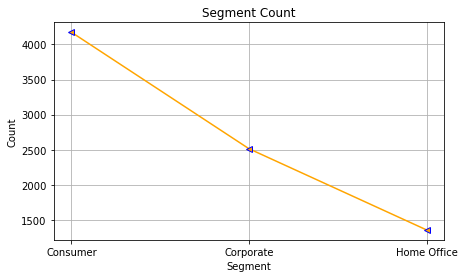

In [93]:
sg=mart['Segment'].value_counts()
plt.figure(figsize=(7,4))
plt.plot(sg.index,sg.values,markeredgecolor='blue',marker='<',color='orange')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Count')
_=plt.grid()

$Observation$:
* Amazing Mart has Customers from three segments which are <b> Consumer, Corporate, Home Office.</b>
* The Amazing Mart has a maximum number of customers from the <b>consumer segment.</b>
* And it has a lower number of customers from the <b>Home Office.</b>

#### EDA for Category column using(Matplotlib)

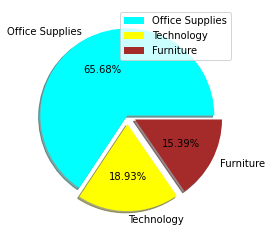

In [94]:
ct=mart['Category'].value_counts()
ct.index
ct.values
plt.pie(ct.values,labels=ct.index,autopct='%.2f%%',
        colors=['cyan','yellow','brown'],shadow=True,explode=(0,0.1,0.1))
plt.legend(loc='upper right')
plt.show()

$Observation$:
* We can see that in Amazing mart most of the people order Office Supplies based products.
* Only 18% of people order Technology-based products.
* And 15% of people like to purchase Furniture-based commodities.

### EDA for Sub - Category column using (Matplotlib)

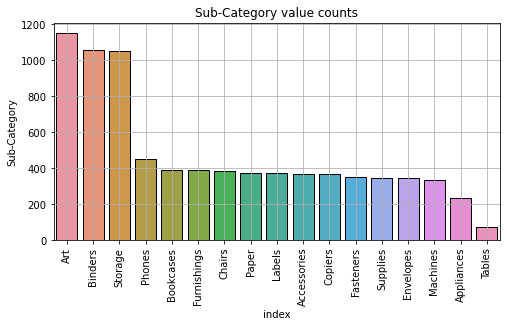

In [135]:
sc=mart['Sub-Category'].value_counts().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='index',y='Sub-Category',data=sc,edgecolor='black')
plt.xticks(rotation=90)
plt.title('Sub-Category value counts')
_=plt.grid()

$Observation$:
* In data set there are 17 Sub-Category products.
* Art, Binders, Storage based products are the most ordered products.

#### EDA for Country Customer Counts

In [96]:
country_gp=mart.groupby('Country')
cn=country_gp.agg({'Order ID':'nunique'})
customer_count=cn.reset_index()

In [97]:
country_map1 = dict(type='choropleth',
           locations=customer_count['Country'],
           locationmode='country names',
           z=customer_count['Order ID'],
            reversescale = True,
           text=customer_count['Country'],
           colorscale='earth',
           colorbar={'title':'Customer Count'})

In [98]:
layout = dict(title='Countries wise Customer Count',
             geo=dict(showframe=False,projection={'type':'mercator'}))

In [99]:
choromap = go.Figure(data = [country_map1],layout = layout)
iplot(choromap)

$Observation$: 
* Amazing mart has customers from 15 Country.
* It has most of the customers from France, Germany and United Kingdom.
* It has low market in Portugal, Finland, Denmark

#### EDA for Region Counts

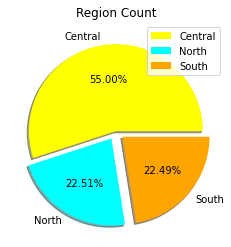

In [100]:
rg=mart['Region'].value_counts()
plt.figure(figsize=(7,4))
plt.pie(rg.values,labels=rg.index,colors=['yellow','cyan','orange'],
        autopct='%.2f%%',shadow=True,explode=(0,0.1,0.1))
plt.title('Region Count')
_=plt.legend()

$Observation$:
* The Amazing Mart has consumers from three Regions they are Central, North Country, South.
* The Region count shows us that the most of the country located in Central Region.
* Other countries are located in North Country and South.

#### EDA for Ship Mode Counts

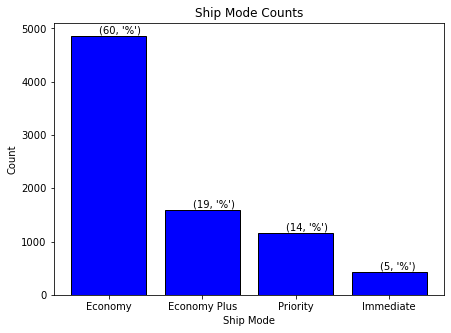

In [101]:
s=list(range(4))
sm=mart['Ship Mode'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.bar(sm['index'],sm['Ship Mode'],color='blue',edgecolor='black')
for i,v in enumerate(sm['Ship Mode']):
    plt.annotate(xy=[s[i]-0.1,int(v)+50],s=(int((v/8045)*100),'%'))
plt.title('Ship Mode Counts')
plt.xlabel('Ship Mode')
_=plt.ylabel('Count')

$Observation$: 
* The Amazing Mart offers four types of shiping mode there are <b> Economy, Economy Plus, Priority, Immediate.</b>
* But <b>60%</b> of the customers prefer Economy based shiping mode.
* Less than <b>20%</b> of the customer perfer other shiping mode.

### Pairplot for numerical columns

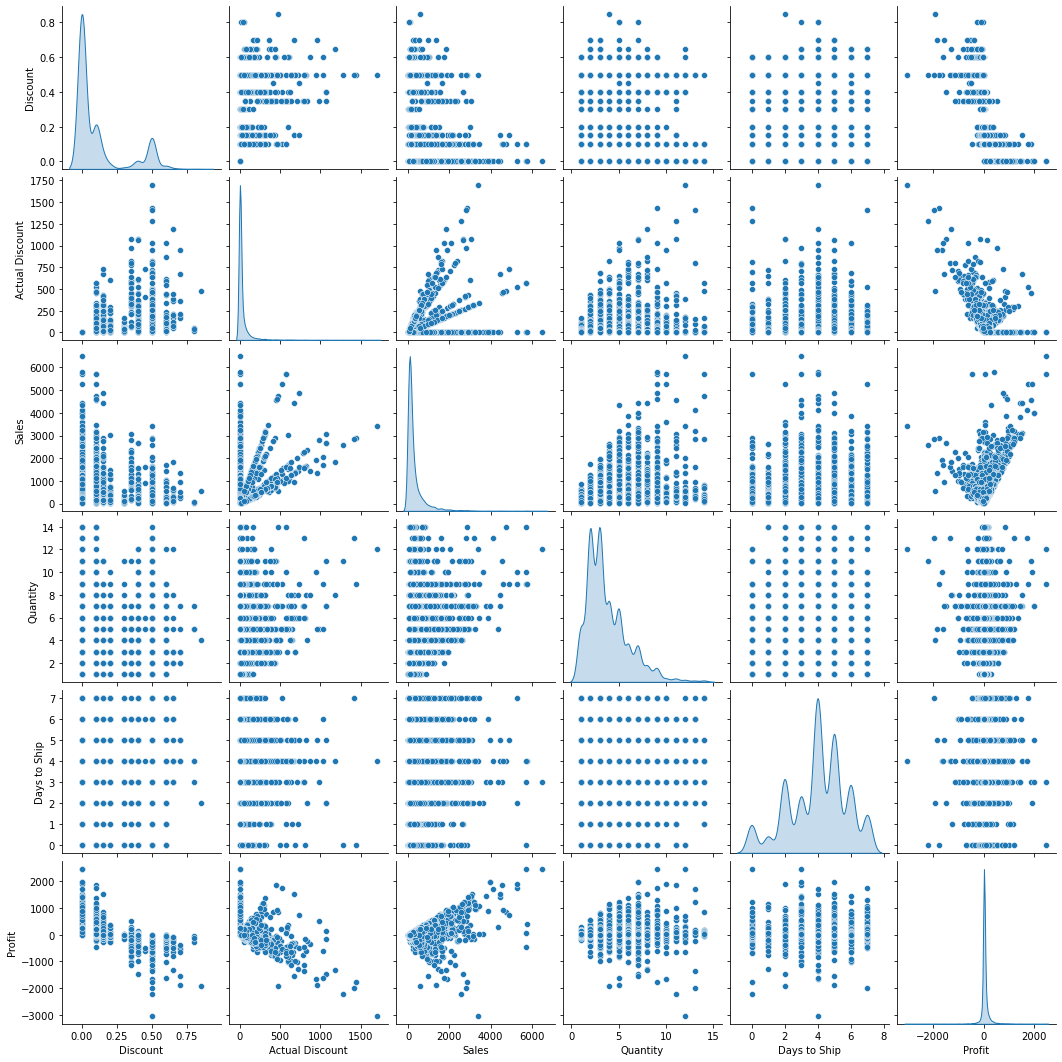

In [102]:
_=sns.pairplot(mart,diag_kind='kde')# Using pair plot for EDA

#### Analysing Correlation between the numerical columns

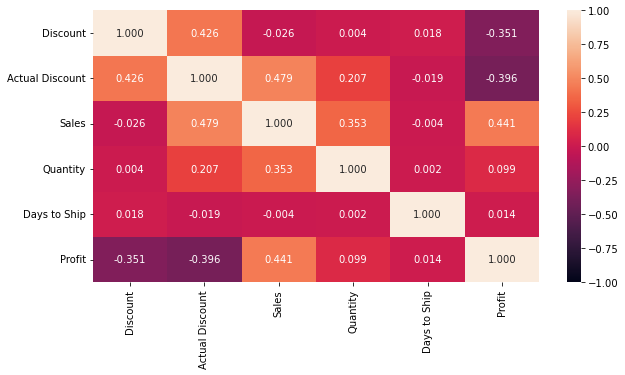

In [103]:
corr=mart.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,fmt='.3f')
_=plt.xticks(rotation=90)

### Frequency Distribution For Numerical Data

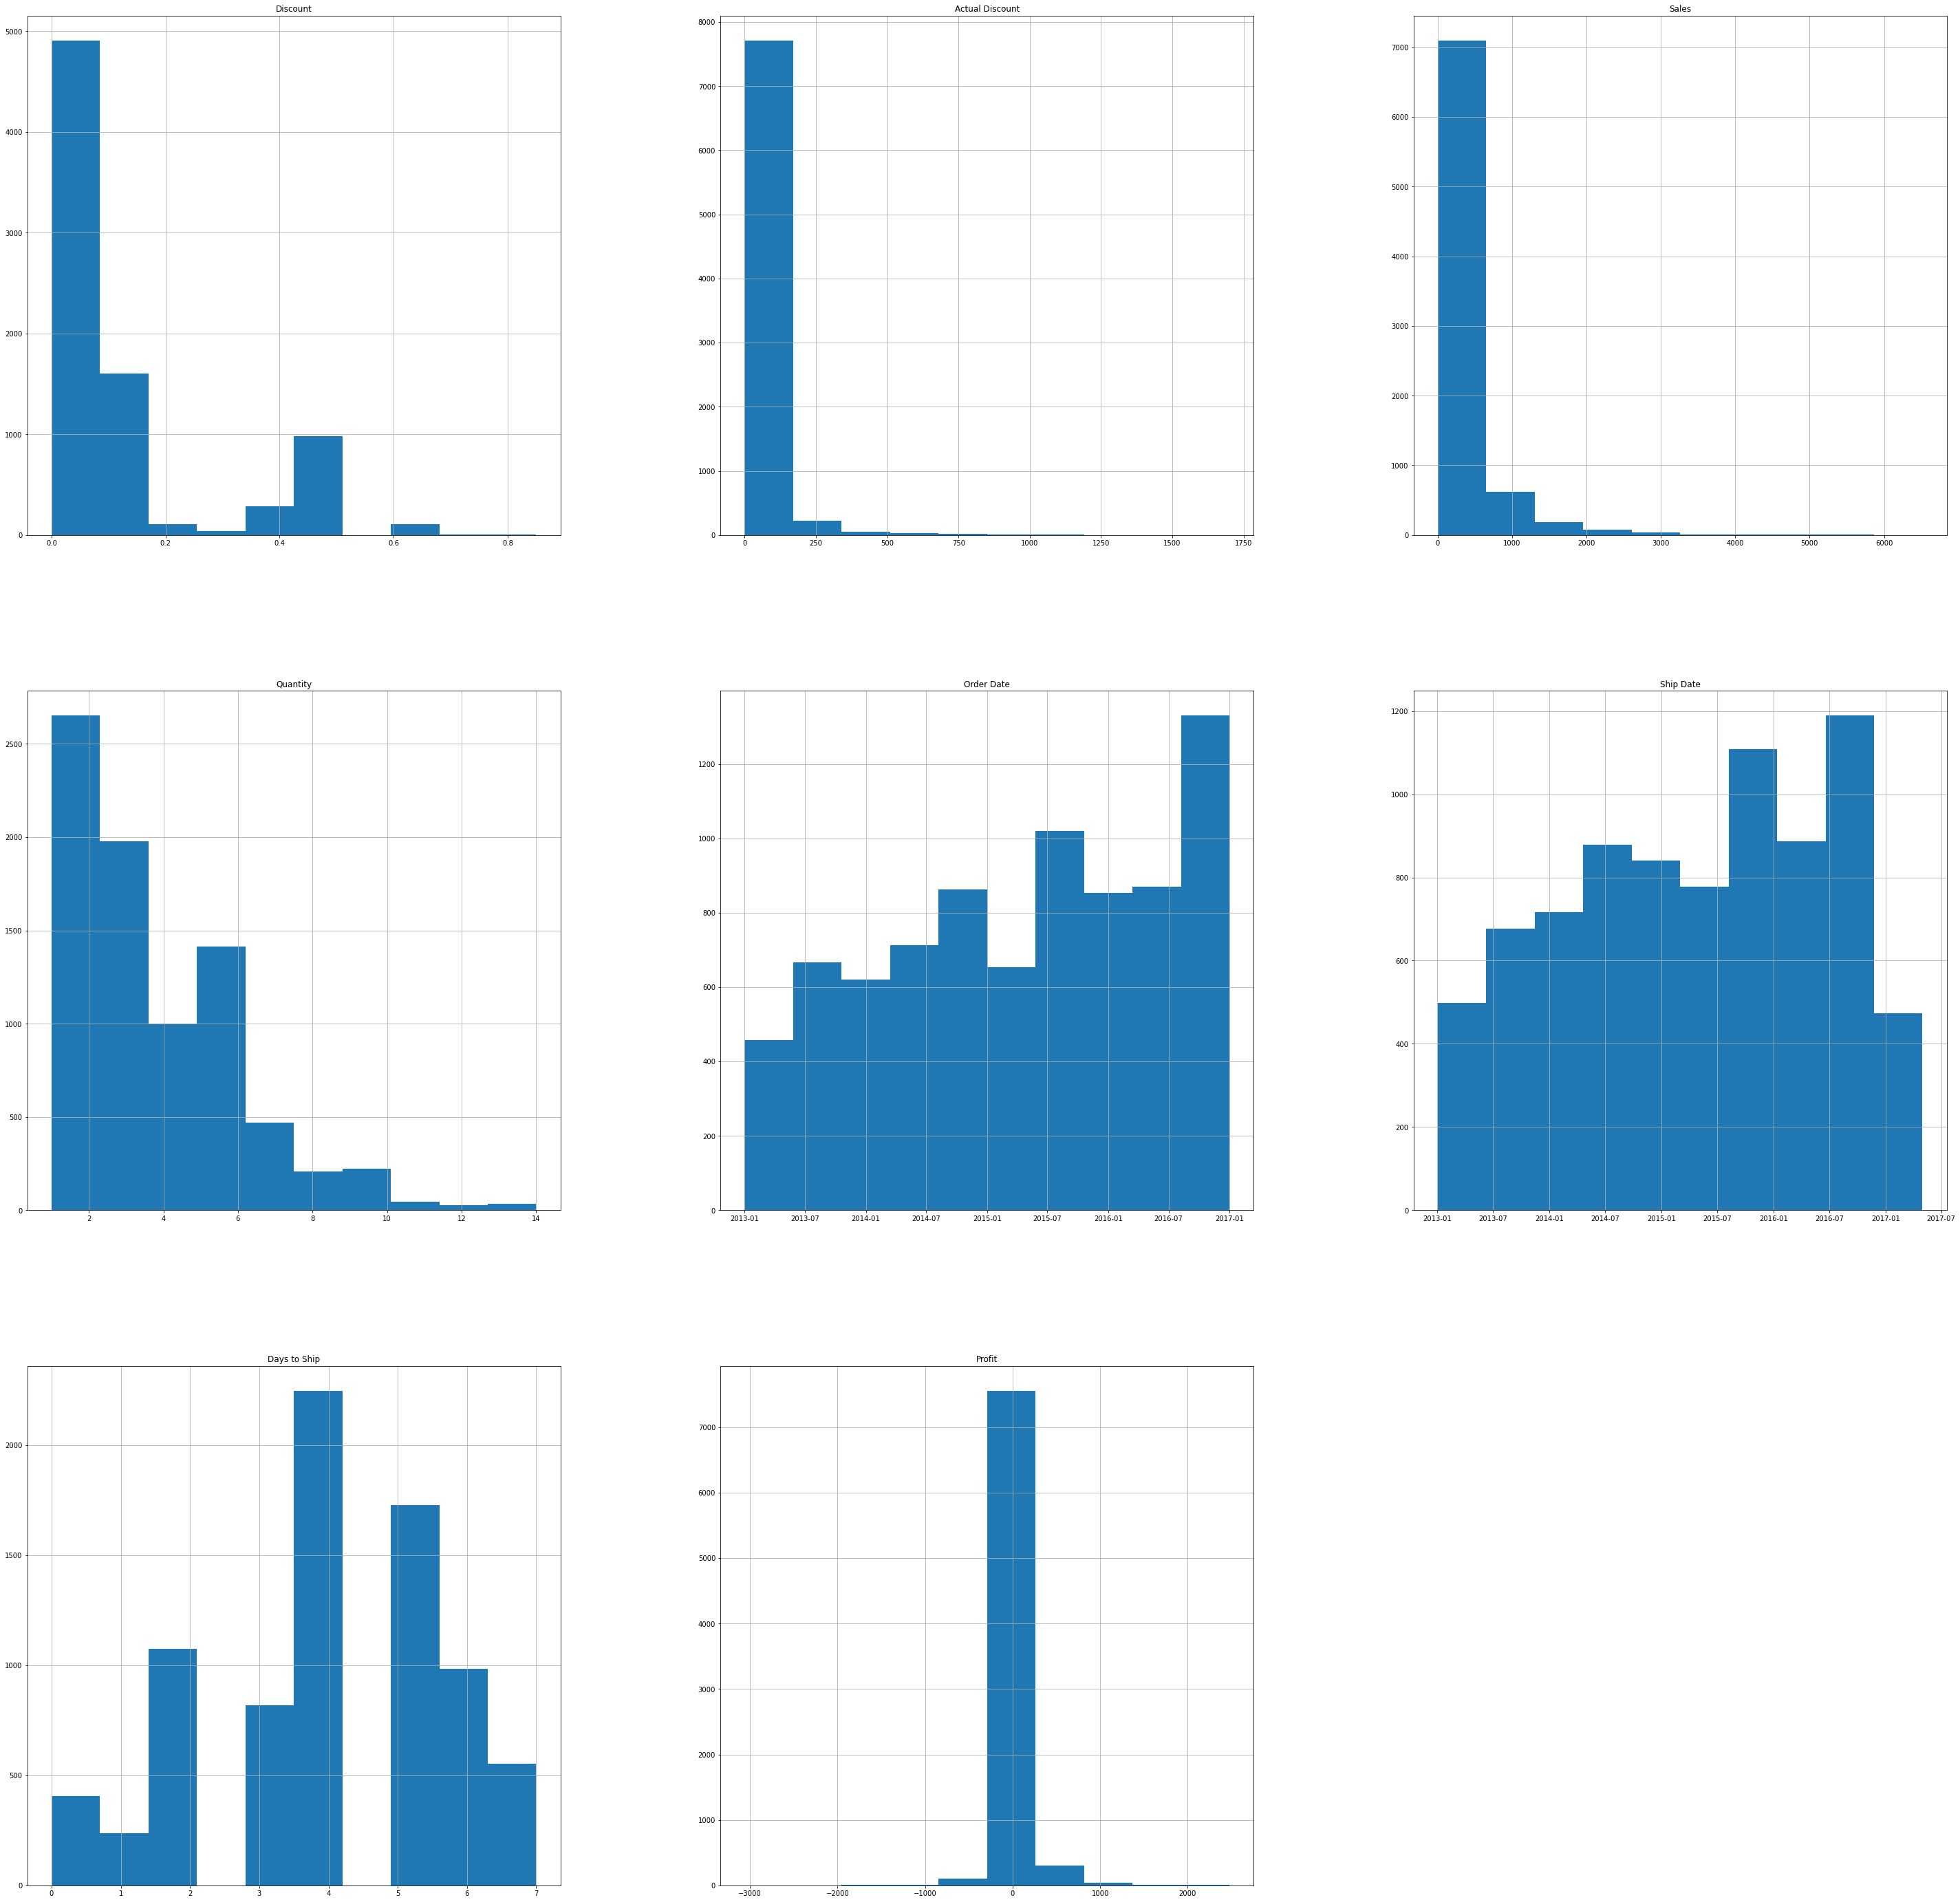

In [104]:
fig = plt.figure(figsize=(50,50))
ax = fig.gca()
_=mart.hist(ax=ax)

$Observation$ :
* Sales has the moderate Positive Correlation with Actual Discount, Profit, and have Low Correlation with Quantity and has Negative Correlation with Days to Ship and Discount.
* Profit has Positive correlation with Sales and other columns are negatively correlated.
* The columns in the data set don't have high correlation.

## Bi-Variate EDA

* Before generating revenue column let's understand the intution behing Revenue.
* Revenue is another word for the amount of money a company generates from its sales.
* Revenue is most simply calculated as the number of units sold multiplied by the selling price.
####                                                   Sales Revenue
####                                            Revenue= Sales * Quantity

In [105]:
mart['Revenue'] = mart['Sales'] * mart['Quantity']

$Observation$:
Now with Revenue we can do further more analysis on Profit and Sales.

In [106]:
mart['Year'] = mart['Order Date'].dt.year
mart['Month']= mart['Order Date'].dt.month
mart.head()

,Order ID,Customer Name,Product Name,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,Order Date,...,Region,Segment,Ship Date,Days to Ship,Ship Mode,State,Profit,Revenue,Year,Month
0,BN-2011-7407039,Ruby Patel,"Enermax Note Cards, Premium",0.5,22.5,45,3,Office Supplies,Paper,2013-01-01,...,North,Home Office,2013-05-01,4,Economy Plus,Stockholm,-26,135,2013,1
1,AZ-2011-9050313,Summer Hayward,"Dania Corner Shelving, Traditional",0.0,0.0,854,7,Furniture,Bookcases,2013-03-01,...,North,Consumer,2013-07-01,4,Economy,England,290,5978,2013,3
2,AZ-2011-6674300,Devin Huddleston,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,3,Office Supplies,Art,2013-04-01,...,Central,Consumer,2013-08-01,4,Economy,Auvergne-RhÃ´ne-Alpes,21,420,2013,4
3,BN-2011-2819714,Mary Parker,"Boston Markers, Easy-Erase",0.5,13.5,27,2,Office Supplies,Art,2013-04-01,...,North,Corporate,2013-09-01,5,Economy,England,-22,54,2013,4
4,BN-2011-2819714,Mary Parker,"Eldon Folders, Single Width",0.5,8.5,17,2,Office Supplies,Storage,2013-04-01,...,North,Corporate,2013-09-01,5,Economy,England,-1,34,2013,4


$Observation$ :
* From order date, we separate year and month to do some yearly and monthly-based analysis.

##### We need to know in which segment the Sales is high and low with that we can take certain measures. 

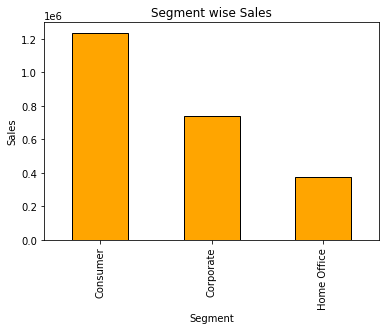

In [107]:
ct=mart.groupby(['Segment'])['Sales'].sum()
ct.plot(kind='bar',stacked=True,edgecolor='Black',color='Orange')
plt.ylabel('Sales')
_=plt.title('Segment wise Sales')

$Observation$ :
* The Consumer Segment has higher sales compared to Corporate and Home Office.
* Home Office segment has poor sales

##### Now we have to further look into the data by Category and Sub-Category based sales.

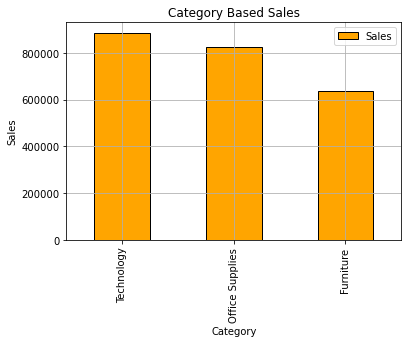

In [108]:
scs=mart.groupby(['Category'])['Sales'].sum().sort_values(ascending=False)
scs.plot(kind='bar',color='orange',edgecolor='black')
plt.title('Category Based Sales')
plt.legend()
plt.ylabel('Sales')
plt.grid()

$Observation$ :
* Amazing Mart has high sales in Technology and Office Supplies.
* But Furniture has low sales compared to Technology and Supplies.

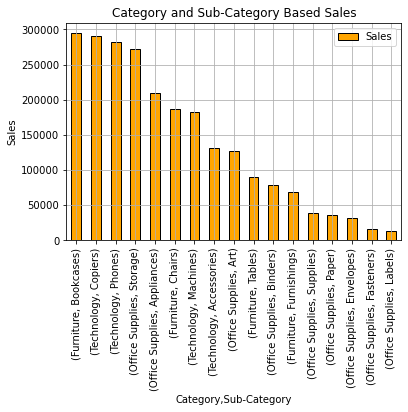

In [109]:
scs=mart.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False)
scs.plot(kind='bar',color='orange',edgecolor='black')
plt.title('Category and Sub-Category Based Sales')
plt.legend()
plt.ylabel('Sales')
plt.grid()

$Observation$ -:
* Overall, bookcases have higher sales in the sub category.
* In the Furniture category, Bookcases and Chairs, only these two had good sales compared to other furniture sub-categories.
* In the Technology category, Copiers and Phones have good sales.
* In Office Supplies, Storage has good sales compared to other office supplies sub categories.
* Envelopes, fasteners, labels has very low sales.

##### We saw the sales-based segment, Category and Sub-Category.  
### Now we are going to see the revenue-based segment, category, and sub-category.

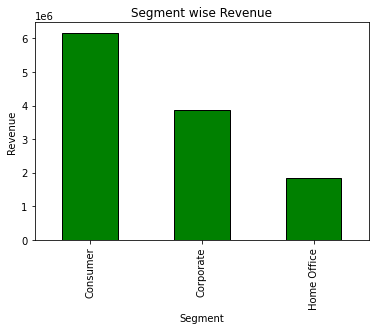

In [110]:
ct=mart.groupby(['Segment'])['Revenue'].sum()
ct.plot(kind='bar',stacked=True,edgecolor='Black',color='Green')
plt.ylabel('Revenue')
_=plt.title('Segment wise Revenue')

$Observation$ :
* As expected amazing mart has high revenue in Consumer Segment.
* Corporate and Home Office segment has low revenue compared to Consumer.

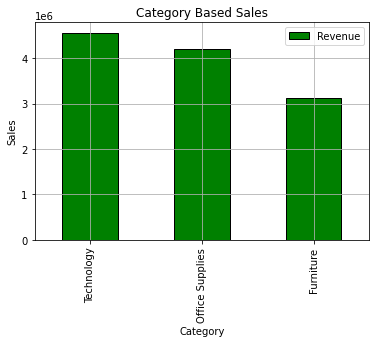

In [111]:
scs2=mart.groupby(['Category'])['Revenue'].sum().sort_values(ascending=False)
scs2.plot(kind='bar',color='green',edgecolor='black')
plt.title('Category Based Sales')
plt.legend()
plt.ylabel('Sales')
plt.grid()

$Observation$ :
* As expected, technology has high revenue

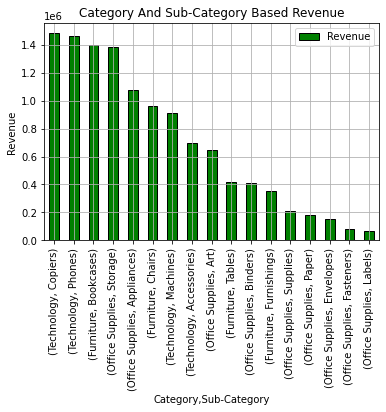

In [112]:
scs=mart.groupby(['Category','Sub-Category'])['Revenue'].sum().sort_values(ascending=False)
scs.plot(kind='bar',color='Green',edgecolor='black')
plt.title('Category And Sub-Category Based Revenue')
plt.legend()
plt.ylabel('Revenue')
plt.grid()

$Observation$ :
* Copiers and Technology got first and second place in revenue even though the bookcase had first place in the sales.
* As excepted Envelopers, Fasterners, Labels has very less revenue.

##### We saw sales and revenue. Now the important part we are going to see is 
#### How much profit do we get from the sales and revenue?

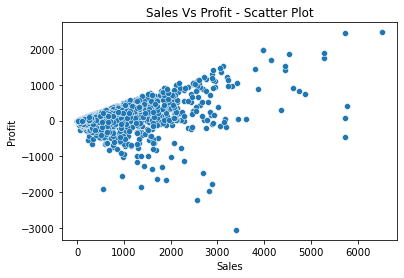

In [113]:
sns.scatterplot(mart['Sales'],mart['Profit'])
plt.title('Sales Vs Profit - Scatter Plot')
plt.xlabel('Sales')
_=plt.ylabel('Profit')

$Observation$:
* There are so many negative values in the profit columns.
* A negative profit margin is when a production costs are more than a total revenue for a specific period.
* A negative margin can be an indication of a company's inability to control costs.
* Sales column affected by outliers.

###### There are so many negative values in the profit column. 
##### So we are going to filter the negative values and positive values and calculate the profit and loss.

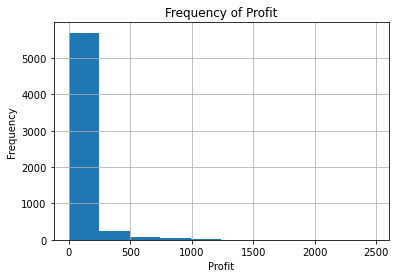

In [114]:
d1=mart[mart['Profit']>0]# filtering the negative values and get Profit
plt.hist(d1.Profit)
plt.title('Frequency of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid()

$Observation$ :
* From the graph we can see that the profit is Right-skewed
* The high frequency of the profit between 0 to 250.

#### Profit based on Segment

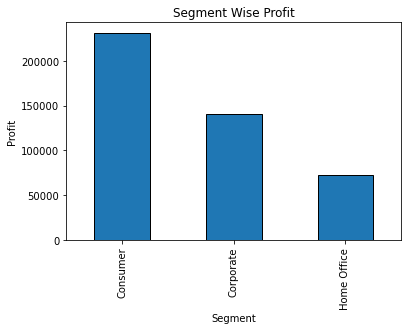

In [115]:
pt=d1.groupby('Segment')['Profit'].sum()
pt.plot(kind='bar',edgecolor='black')
plt.title('Segment Wise Profit')
plt.xlabel('Segment')
_=plt.ylabel('Profit')

$Observation$ :
* As we expected consumer segment has high profit compared to Corporate and Home Office.

#### Profit based on Category

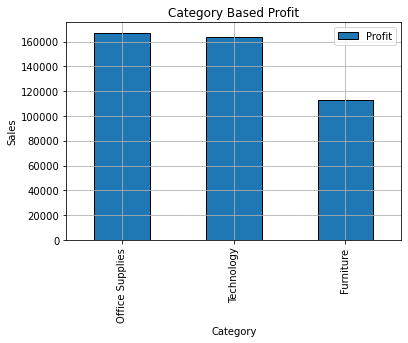

In [116]:
ct=d1.groupby(['Category'])['Profit'].sum().sort_values(ascending=False)
ct.plot(kind='bar',edgecolor='black')
plt.title('Category Based Profit')
plt.legend()
plt.ylabel('Sales')
plt.grid()

$Observation$ :
* <i>Office Supplies and Technology are almost equal in profit, even though the sales of office supply are less than technology.
* <i> According to the sales and Revenue of Office Supplies, it has Good Profit compare to the technology.

#### Profit based on Sub-Category

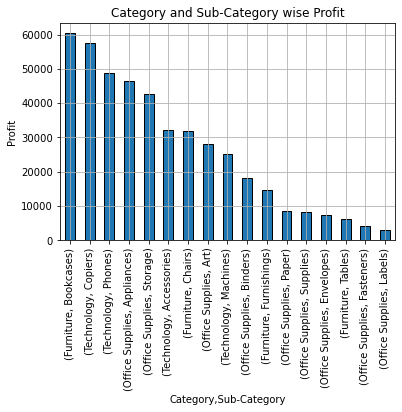

In [117]:
cp1=d1.groupby(['Category','Sub-Category'])['Profit'].sum().sort_values(ascending=False)
cp1.plot(kind='bar',edgecolor='black')
plt.ylabel('Profit')
_=plt.title('Category and Sub-Category wise Profit')
plt.grid()

$Observation$ :
* <i> In the sub-category, bookcases have in first place and copiers have in second place and phones have third place in the profit.

#### Now we are going to calculate the Loss.

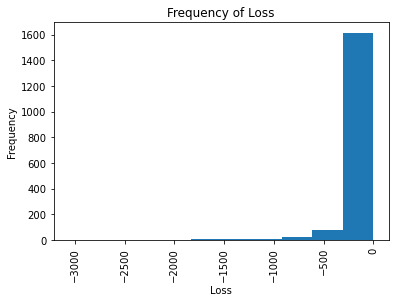

In [118]:
d2=mart[mart['Profit']<0]# filtering the postive values and get Loss
plt.hist(d2.Profit)
plt.title('Frequency of Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
_=plt.xticks(rotation=90)

$Observation$ :
* From the graph we can see that the loss is Left-Skewed

#### Loss based on segment

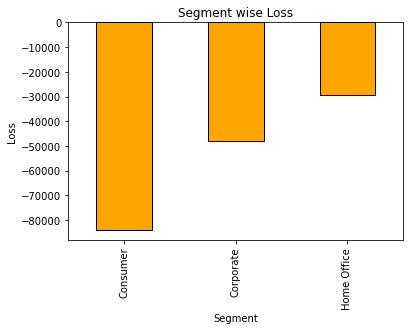

In [119]:
pn=d2.groupby('Segment')['Profit'].sum()
pn.plot(kind='bar',color='Orange',edgecolor='black')
plt.title('Segment wise Loss')
_=plt.ylabel('Loss')

$Observation$ :
* In Loss also consumer segment has the First place. 

#### Loss Based Category

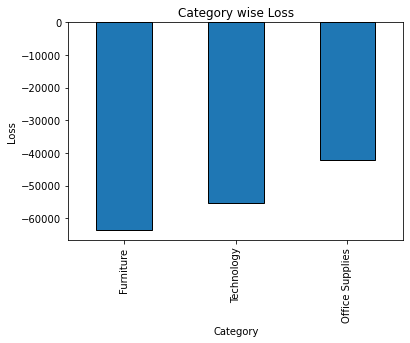

In [120]:
cp2=d2.groupby(['Category'])['Profit'].sum().sort_values()
cp2.plot(kind='bar',edgecolor='black')
plt.ylabel('Loss')
_=plt.title('Category wise Loss')

$Observation$:
* Not only did furniture have lower sales, the losses are high compared to Technology and Office Supplies.

#### Loss Based on Sub-Category

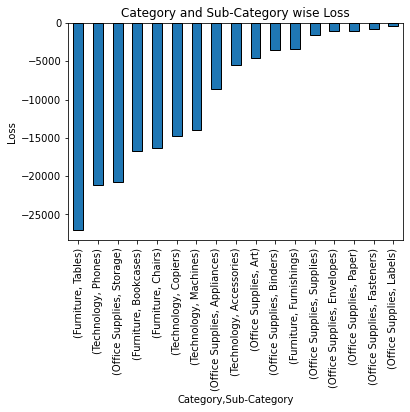

In [121]:
cp2=d2.groupby(['Category','Sub-Category'])['Profit'].sum().sort_values()
cp2.plot(kind='bar',edgecolor='black')
plt.ylabel('Loss')
plt.title('Category wise Loss')
_=plt.title('Category and Sub-Category wise Loss')

$Observation$ :
* In Sub-category the tables loss is greater than the profit.
* Phone and Storage are in the second and third place in loss.
* The profit and loss of paper, labels and fasteners are less.

#### Comparing Profit and Sales based on Category and Sub-Category.

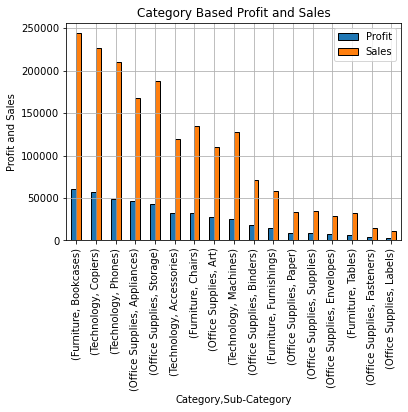

In [122]:
cas=d1.groupby(['Category','Sub-Category'])['Profit','Sales'].sum().sort_values(by='Profit',ascending=False)
cas.plot(kind='bar',edgecolor='black')
plt.title('Category Based Profit and Sales')
plt.legend()
plt.ylabel('Profit and Sales')
plt.grid()

$Observation$ :
* If we compare appliances and storage, the appliances has Less sales and High profit, storage has High sales and Less profit.
* If we compare Accessories and Chairs, the Accessories has Less sales and High profit, chairs has High sales and Less profit.
* Likewise, we compare art and machines. Art has Less Sales and High profit, Machines has High Sales and Less profit.

#### Comparing Profit and Revenue based on category and sub-category.

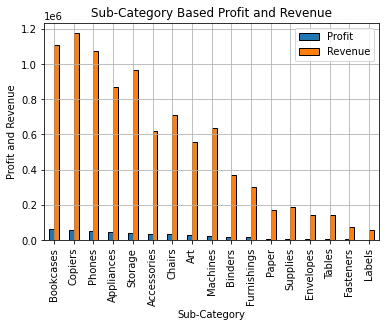

In [123]:
sc1=d1.groupby('Sub-Category')['Profit','Revenue'].sum().sort_values(by='Profit',ascending=False)
sc1.plot(kind='bar',edgecolor='black')
plt.title('Sub-Category Based Profit and Revenue')
plt.ylabel('Profit and Revenue')
plt.xticks(rotation=90)
plt.grid()

$Observation$ :
* If we compare Bookcase and Copiers the revenue of the Bookcase is less than Copiers But the Profit of the Bookcase is greater than the Copiers.

#### Profit and sales based on year.

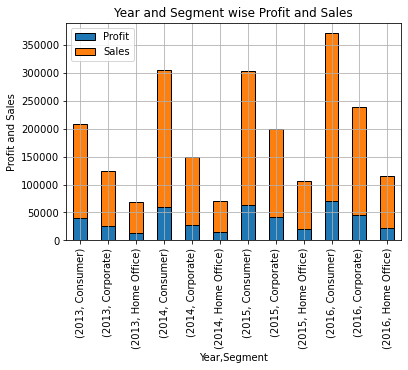

In [124]:
year=d1.groupby(['Year','Segment'])['Profit','Sales'].sum().sort_values(by='Year',ascending=True)
year.plot(kind='bar',edgecolor='black',stacked=True)
plt.title('Year and Segment wise Profit and Sales')
_=plt.ylabel('Profit and Sales')
plt.grid()

$Observation$ :
* From the graph we can see that over the year the profit and sales have increased in all segments.
* Each and every year consumer segment as the first place.

### Loss and Sales based on Year

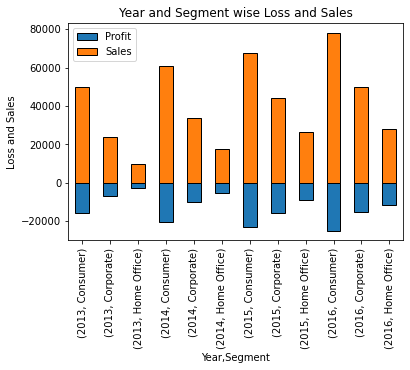

In [125]:
yearloss=d2.groupby(['Year','Segment'])['Profit','Sales'].sum().sort_values(by='Year',ascending=True)
yearloss.plot(kind='bar',edgecolor='black',stacked=True)
plt.title('Year and Segment wise Loss and Sales')
_=plt.ylabel('Loss and Sales')

$Observation:$
* Over the year, loss also increased.

* in loss,the consumer segment was first place. 

### Comparing Profit and Loss Based on Year

In [126]:
year1=d1.groupby(['Year'])['Profit'].sum().sort_values(ascending=True).reset_index()
year2=d2.groupby(['Year'])['Profit'].sum().sort_values(ascending=True).reset_index()
y=pd.merge(year1,year2,how='inner',on='Year')    

In [127]:
def highlight_col(x):
    df=x.copy()
    df.loc[:,['Profit_x']]='background-color:yellow'
    df.loc[:,['Profit_y']]='background-color:lightblue'
    df[['Year']]='background-color:lightgreen'
    return df

In [128]:
display(y.style.apply(highlight_col,axis=None))

,Year,Profit_x,Profit_y
0,2013,79689,-25202
1,2014,101852,-35794
2,2015,125252,-48217
3,2016,137393,-51771


$Observation:$
* Comparing all the years, 2016 has the maximum profit and maximum loss.

* Even though the loss increased each and every year, compared to profit, the loss percentage is below 50 only which means Amazing mart not faced that much loss.

#### Profit and Loss from the Countries

In [129]:
country_profit=mart.groupby('Country')['Profit'].sum().reset_index()
country_profit
country_map=dict(type='choropleth',locations=country_profit['Country'],
                 locationmode='country names',z=country_profit['Profit'],reversescale=True,
                 text=country_profit['Country'],colorscale='earth',colorbar={'title':'Profit and Loss'})

In [130]:
layout = dict(title='Countries wise Profit and Loss',
             geo=dict(showframe=False,projection={'type':'mercator'}))

In [138]:
choromap = go.Figure(data = [country_map],layout = layout)
iplot(choromap)
#country_profit

$Observation$: 
* From the graph we can see that United Kingdom, Germany and France are top three countries with high profit.
* Spain, Italy, Belgium, Switzerland, Austria has the moderate profit.
* The Netherlands and Sweden are the countries with heavy losses.
* Ireland, Portugal, Denmark countries had moderate losses.

#### Profit, Sales, Actual Discount based on Category and Sub-category

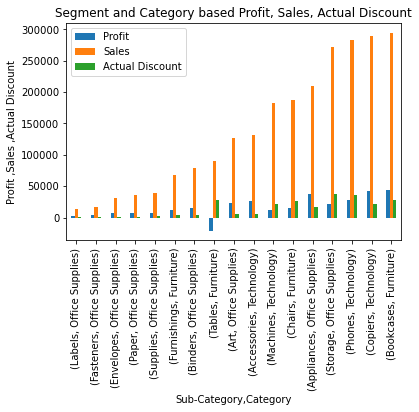

In [132]:
ds=mart.groupby(['Sub-Category','Category'])['Profit','Sales','Actual Discount'].sum().sort_values(by='Sales')
ds.plot(kind='bar')
plt.title('Segment and Category based Profit, Sales, Actual Discount')
_=plt.ylabel('Profit ,Sales ,Actual Discount')

$Observation$ :
* This graph clearly shows that profit declined when the actual discount increased and when the actual discount declined, the profit increased.

#### Scatter plot using Acutal Discount and Sales

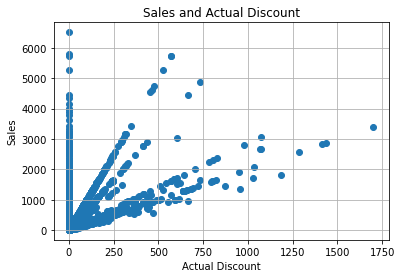

In [133]:
plt.scatter(mart['Actual Discount'],mart['Sales'])
plt.xlabel('Actual Discount')
plt.ylabel('Sales')
plt.title('Sales and Actual Discount')
plt.grid()

$Observation$ :
* This graph shows that the actual discount has not changed the sales.
* Actual Discount also affected by outliers.

### Boxplot for Quantity

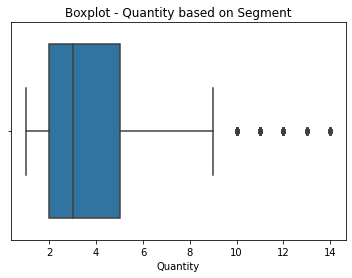

In [134]:
sns.boxplot(x=mart['Quantity'])
_=plt.title('Boxplot - Quantity based on Segment')


$Observation$:
* Quantity has the right skewed distribution with minimum outliers towards the higher end.
* The median of the Quantity is 3.

## Conclusion
* The actual discount affects profit even though it does not affect the sales of products.
* Amazing Mart has the major profit from the consumer segment.
* Overall, Amazing Mart had good growth in profit and sales over the year.